In [40]:
# prompt: connect drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd

In [42]:
df = pd.read_excel(r"/content/drive/MyDrive/VINH UP/PREPARE DATA.xlsx")
df

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,H,I,J,K,DOB,gender,address,Website,job,industry
0,0000000014,25,1,90000,0,2,0,0,0,0,...,0,0,0,0,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,1,2,180000,2,0,0,2,2,0,...,0,0,0,0,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,9,1,90000,2,0,0,0,2,0,...,0,0,0,0,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,26,2,180000,0,4,0,0,0,0,...,0,0,0,0,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,6,2,180000,0,2,0,2,2,0,...,2,0,0,0,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,0,3,270000,2,3,0,0,2,0,...,0,2,3,0,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",NaN,specialist,finance
4475,KH9958204,6,1,135000,0,0,0,3,0,0,...,0,0,0,3,36892,Nữ,"Phước Mỹ, ĐN",NaN,teenager,NaN
4476,WEBS00000043900,22,2,180000,0,0,0,2,0,0,...,1,0,0,0,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction
4477,WEBS00000044909,1,1,180000,0,4,0,0,0,0,...,0,0,0,0,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance


In [43]:
columns_to_drop = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                   'Sáng', 'Trưa', 'Chiều', 'Tối', 'Khuya']

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [44]:
df.isnull().sum()

,0
customerid,0
Recency,0
Frequency,0
Monetary,0
action,0
action-adventure,0
animation,0
comedy,0
crime,0
drama,0


In [45]:
# Điền giá trị phổ biến nhất cho DOB, gender, job
df['DOB'].fillna(df['DOB'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)

# Điền industry bằng chuỗi 'Nan'
df['industry'].fillna('Nan', inplace=True)

# Xoá cột Website và address
df.drop(columns=['Website', 'address'], inplace=True)

<ipython-input-45-29ae11179de8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DOB'].fillna(df['DOB'].mode()[0], inplace=True)
<ipython-input-45-29ae11179de8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [46]:
df.isnull().sum()

,0
customerid,0
Recency,0
Frequency,0
Monetary,0
action,0
action-adventure,0
animation,0
comedy,0
crime,0
drama,0


In [47]:
def convert_excel_date(x):
    try:
        # Nếu là số -> chuyển từ Excel serial
        if isinstance(x, (int, float)):
            return pd.to_datetime(x, origin='1899-12-30', unit='D')
        # Nếu là chuỗi ngày hợp lệ
        else:
            return pd.to_datetime(x, errors='coerce')
    except:
        return pd.NaT  # Nếu không chuyển được thì gán NaT (null)

df['DOB'] = df['DOB'].apply(convert_excel_date)

In [48]:
# Sau khi chuyển đổi DOB, có một số giá trị bị lỗi vì hông hợp lệ hoặc bị định dạng sai
invalid_dob = df[df['DOB'].isna()]
invalid_dob

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,horror,melodrama,mystery,romance,sci-fi,thriller,DOB,gender,job,industry
1177,0001013549,12,1,315000,0,7,0,7,0,0,...,0,0,7,0,7,0,NaT,Nam,teenager,Nan
1563,0001077023,20,1,585000,0,0,0,0,0,0,...,13,0,13,0,0,13,NaT,Nam,teenager,Nan
2207,0001120656,5,6,540000,0,9,3,6,0,0,...,3,0,0,0,9,0,NaT,Nam,teenager,Nan


In [49]:
# Tìm giá trị xuất hiện nhiều nhất (mode), bỏ qua NaT
most_common_dob = df['DOB'].mode()[0]

# Thay thế NaT bằng giá trị xuất hiện nhiều nhất
df['DOB'].fillna(most_common_dob, inplace=True)

<ipython-input-49-1ce66b140173>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DOB'].fillna(most_common_dob, inplace=True)


In [50]:
df.columns

Index(['customerid', 'Recency', 'Frequency', 'Monetary', 'action',
       'action-adventure', 'animation', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'horror', 'melodrama', 'mystery', 'romance', 'sci-fi',
       'thriller', 'DOB', 'gender', 'job', 'industry'],
      dtype='object')

In [51]:
# Chuyển DOB thành tuổi
df['age'] = (pd.Timestamp('today') - df['DOB']).dt.days // 365

# Tính mode (giá trị xuất hiện nhiều nhất)
age_mode = df['age'].mode()[0]

# Thay các giá trị tuổi <= 0 bằng mode
df.loc[df['age'] <= 0, 'age'] = age_mode

# Loại bỏ cột DOB nếu chưa làm
df_roof = df.copy()
df.drop(columns=['DOB'], inplace=True, errors='ignore')

In [52]:
# One-Hot Encoding cho cột 'job' và 'industry'
df = pd.get_dummies(df, columns=['job', 'industry'], drop_first=True)

# Mã hóa cột phân loại 'gender' bằng cat.codes
df['gender'] = df['gender'].astype('category').cat.codes

In [53]:
from sklearn.preprocessing import StandardScaler

# Các cột số cần chuẩn hóa
numeric_columns = ['Recency', 'Frequency', 'Monetary', 'age'] + ['action', 'action-adventure', 'animation', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'horror', 'melodrama', 'mystery', 'romance', 'sci-fi', 'thriller']

# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [54]:
df.isnull().sum()

,0
customerid,0
Recency,0
Frequency,0
Monetary,0
action,0
action-adventure,0
animation,0
comedy,0
crime,0
drama,0


### __KMEANS__

In [55]:
from sklearn.cluster import KMeans

# Bỏ cột 'customerid' vì đó là chỉ mục và không tham gia vào quá trình phân cụm
X = df.drop(columns='customerid')

# Bước 1: Áp dụng K-Means với số cụm mong muốn (ví dụ 4 cụm)
kmeans = KMeans(n_clusters=4, random_state=42)

# Dự đoán nhãn phân cụm và gán vào cột 'cluster' trong df
df['cluster'] = kmeans.fit_predict(X)

# Xem kết quả phân cụm
print(df[['customerid', 'cluster']].head())

   customerid  cluster
0  0000000014        0
1  0000000034        3
2  0000000051        3
3  0000000081        0
4  0000000098        3


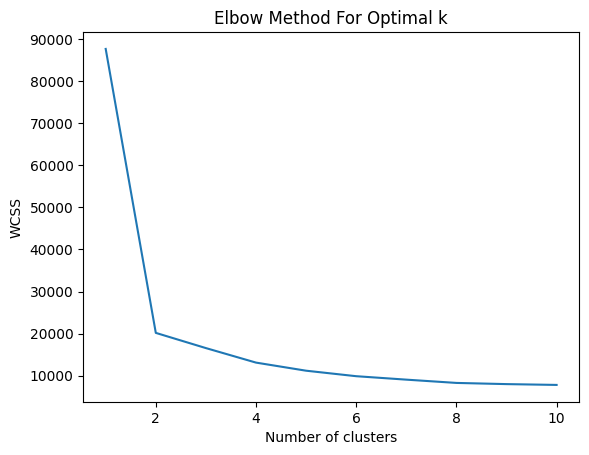

In [56]:
import matplotlib.pyplot as plt

# Tính toán WCSS (Within-cluster sum of squares) cho nhiều giá trị n_clusters
wcss = []
for i in range(1, 11):  # Kiểm tra từ 1 đến 10 cụm
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
df_segmentation = pd.merge(df_roof, df[['customerid', 'cluster']], on="customerid", how="left")

In [21]:
# df_segmentation.to_excel("C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\SEGMENTATION.xlsx", index = None)

NameError: name 'df_segmentation' is not defined

In [58]:
# Lặp qua từng giá trị của cluster
for cluster_label in sorted(df_segmentation['cluster'].unique()):
    print(f"\n📦=== THỐNG KÊ CHO CLUSTER {cluster_label} ===📦")

    # Lọc dữ liệu của cluster hiện tại
    cluster_data = df_segmentation[df_segmentation['cluster'] == cluster_label]

    # Số lượng phần tử trong cluster
    print(f"🔢 Số lượng khách hàng trong cụm: {len(cluster_data)}")

    # Bỏ cột không cần thiết nếu có (ví dụ customerid)
    cluster_data_numeric = cluster_data.select_dtypes(include='number').drop(columns=['customerid'], errors='ignore')

    # Tính các chỉ số thống kê
    summary_df = pd.DataFrame({
        'Tổng': cluster_data_numeric.sum(),
        'Trung bình': cluster_data_numeric.mean(),
        'Min': cluster_data_numeric.min(),
        'Max': cluster_data_numeric.max(),
        'Mode': cluster_data_numeric.mode().iloc[0]
    })

    # Hiển thị bảng thống kê
    display(summary_df)


📦=== THỐNG KÊ CHO CLUSTER 0 ===📦
🔢 Số lượng khách hàng trong cụm: 2230


,Tổng,Trung bình,Min,Max,Mode
Recency,48272,21.646637,11,30,26
Frequency,3095,1.387892,1,18,1
Monetary,356075000,159674.887892,45000,4530000,90000
action,341,0.152915,0,12,0
action-adventure,3728,1.671749,0,57,0
animation,0,0.000000,0,0,0
comedy,1447,0.648879,0,27,0
crime,418,0.187444,0,27,0
drama,262,0.117489,0,12,0
family,638,0.286099,0,13,0



📦=== THỐNG KÊ CHO CLUSTER 1 ===📦
🔢 Số lượng khách hàng trong cụm: 1


,Tổng,Trung bình,Min,Max,Mode
Recency,0,0.0,0,0,0
Frequency,4043,4043.0,4043,4043,4043
Monetary,490635000,490635000.0,490635000,490635000,490635000
action,885,885.0,885,885,885
action-adventure,4007,4007.0,4007,4007,4007
animation,244,244.0,244,244,244
comedy,2911,2911.0,2911,2911,2911
crime,1074,1074.0,1074,1074,1074
drama,401,401.0,401,401,401
family,1694,1694.0,1694,1694,1694



📦=== THỐNG KÊ CHO CLUSTER 2 ===📦
🔢 Số lượng khách hàng trong cụm: 1


,Tổng,Trung bình,Min,Max,Mode
Recency,0,0.0,0,0,0
Frequency,2854,2854.0,2854,2854,2854
Monetary,330290000,330290000.0,330290000,330290000,330290000
action,469,469.0,469,469,469
action-adventure,3037,3037.0,3037,3037,3037
animation,361,361.0,361,361,361
comedy,2496,2496.0,2496,2496,2496
crime,616,616.0,616,616,616
drama,184,184.0,184,184,184
family,1437,1437.0,1437,1437,1437



📦=== THỐNG KÊ CHO CLUSTER 3 ===📦
🔢 Số lượng khách hàng trong cụm: 2247


,Tổng,Trung bình,Min,Max,Mode
Recency,13491,6.004005,0,20,0
Frequency,4649,2.068981,1,206,1
Monetary,509815000,226886.960392,45000,23310000,90000
action,1442,0.641745,0,40,0
action-adventure,4352,1.936805,0,201,0
animation,370,0.164664,0,33,0
comedy,3881,1.727192,0,221,0
crime,1710,0.761015,0,42,0
drama,541,0.240765,0,16,0
family,2564,1.141077,0,120,0


### __DBSCAN__

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Bỏ cột 'customerid' vì không tham gia phân cụm
df_dbscan = df.drop(columns=['customerid', 'cluster'])

# Áp dụng DBSCAN
dbscan = DBSCAN(eps=1.4000000000000004, min_samples=5)  # eps và min_samples có thể tinh chỉnh
clusters = dbscan.fit_predict(df_dbscan)

# Gán kết quả phân cụm vào DataFrame
df['cluster'] = clusters

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

best_score = -1
best_params = {}
for eps in np.arange(0.3, 1.5, 0.1):
    for min_samples in range(3, 10):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_dbscan)

        # Tính số cụm thực sự (không tính outlier -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Chỉ xét nếu số cụm hợp lệ
        if 2 <= n_clusters <= 10:
            try:
                score = silhouette_score(df_dbscan, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters}
            except:
                continue

print(f"Best params: {best_params}, Silhouette Score: {best_score:.4f}")

Best params: {'eps': np.float64(1.4000000000000004), 'min_samples': 5, 'n_clusters': 3}, Silhouette Score: 0.1472


In [66]:
df_segmentation = pd.merge(df_roof, df[['customerid', 'cluster']], on="customerid", how="left")

In [67]:
# Lặp qua từng giá trị của cluster
for cluster_label in sorted(df_segmentation['cluster'].unique()):
    print(f"\n📦=== THỐNG KÊ CHO CLUSTER {cluster_label} ===📦")

    # Lọc dữ liệu của cluster hiện tại
    cluster_data = df_segmentation[df_segmentation['cluster'] == cluster_label]

    # Số lượng phần tử trong cluster
    print(f"🔢 Số lượng khách hàng trong cụm: {len(cluster_data)}")

    # Bỏ cột không cần thiết nếu có (ví dụ customerid)
    cluster_data_numeric = cluster_data.select_dtypes(include='number').drop(columns=['customerid'], errors='ignore')

    # Tính các chỉ số thống kê
    summary_df = pd.DataFrame({
        'Tổng': cluster_data_numeric.sum(),
        'Trung bình': cluster_data_numeric.mean(),
        'Min': cluster_data_numeric.min(),
        'Max': cluster_data_numeric.max(),
        'Mode': cluster_data_numeric.mode().iloc[0]
    })

    # Hiển thị bảng thống kê
    display(summary_df)


📦=== THỐNG KÊ CHO CLUSTER -1 ===📦
🔢 Số lượng khách hàng trong cụm: 51


,Tổng,Trung bình,Min,Max,Mode
Recency,502,9.843137e+00,0,30,0
Frequency,7209,1.413529e+02,1,4043,1
Monetary,863885000,1.693892e+07,45000,490635000,135000
action,1469,2.880392e+01,0,885,0
action-adventure,7446,1.460000e+02,0,4007,0
animation,651,1.276471e+01,0,361,0
comedy,5685,1.114706e+02,0,2911,0
crime,1822,3.572549e+01,0,1074,0
drama,644,1.262745e+01,0,401,0
family,3332,6.533333e+01,0,1694,0



📦=== THỐNG KÊ CHO CLUSTER 0 ===📦
🔢 Số lượng khách hàng trong cụm: 3310


,Tổng,Trung bình,Min,Max,Mode
Recency,45985,13.892749,0,30,26
Frequency,5498,1.661027,1,14,1
Monetary,585710000,176951.661631,45000,1750000,90000
action,1304,0.393958,0,11,0
action-adventure,5831,1.761631,0,22,0
animation,229,0.069184,0,10,0
comedy,3512,1.061027,0,19,0
crime,1538,0.464653,0,11,0
drama,487,0.147130,0,7,0
family,2178,0.658006,0,14,0



📦=== THỐNG KÊ CHO CLUSTER 1 ===📦
🔢 Số lượng khách hàng trong cụm: 1091


,Tổng,Trung bình,Min,Max,Mode
Recency,14975,13.725940,0,30,26
Frequency,1883,1.725940,1,19,1
Monetary,231505000,212195.233731,45000,2340000,90000
action,351,0.321723,0,18,0
action-adventure,1782,1.633364,0,31,0
animation,95,0.087076,0,8,0
comedy,1505,1.379468,0,27,0
crime,445,0.407883,0,27,0
drama,252,0.230981,0,16,0
family,793,0.726856,0,20,0



📦=== THỐNG KÊ CHO CLUSTER 2 ===📦
🔢 Số lượng khách hàng trong cụm: 27


,Tổng,Trung bình,Min,Max,Mode
Recency,301,11.148148,0,29,0.0
Frequency,51,1.888889,1,8,1.0
Monetary,5715000,211666.666667,45000,1125000,90000.0
action,13,0.481481,0,3,0.0
action-adventure,65,2.407407,0,19,0.0
animation,0,0.000000,0,0,0.0
comedy,33,1.222222,0,8,0.0
crime,13,0.481481,0,3,0.0
drama,5,0.185185,0,2,0.0
family,30,1.111111,0,8,0.0
